<a href="https://colab.research.google.com/github/Manvi234/ML-Concepts/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

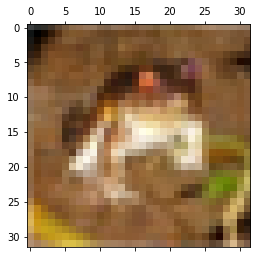

In [8]:
plt.matshow(X_train[0])

In [9]:
classes=['airplane'	,'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
def image(index):
  plt.figure(figsize=(10,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y_train[index]])

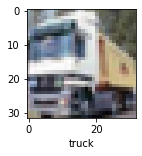

In [11]:
image(1)

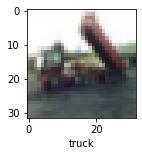

In [12]:
image(2)

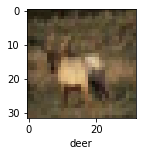

In [13]:
image(3)

In [14]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [15]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [16]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [17]:
y_train_categorical = keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_test_categorical = keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [18]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
from tensorflow.keras import datasets,layers,models

In [20]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 146s 93ms/step - loss: 1.8169 - accuracy: 0.3527
Epoch 2/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.6244 - accuracy: 0.4290
Epoch 3/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.5439 - accuracy: 0.4541
Epoch 4/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.4833 - accuracy: 0.4767
Epoch 5/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.4335 - accuracy: 0.4954


In [21]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = ann.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 10s 31ms/step
              precision    recall  f1-score   support

           0       0.66      0.41      0.50      1000
           1       0.64      0.59      0.61      1000
           2       0.39      0.29      0.33      1000
           3       0.41      0.19      0.26      1000
           4       0.52      0.25      0.34      1000
           5       0.39      0.42      0.40      1000
           6       0.34      0.83      0.48      1000
           7       0.69      0.41      0.52      1000
           8       0.45      0.78      0.57      1000
           9       0.56      0.51      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000



In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])


In [23]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [24]:
cnn.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 75s 47ms/step - loss: 1.4684 - accuracy: 0.4741
Epoch 2/5
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1173 - accuracy: 0.6068
Epoch 3/5
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9944 - accuracy: 0.6528
Epoch 4/5
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9038 - accuracy: 0.6870
Epoch 5/5
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8446 - accuracy: 0.7065


In [25]:
cnn.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.9246 - accuracy: 0.6862


[0.9246440529823303, 0.6862000226974487]

In [26]:
y_predict = cnn.predict(X_test_scaled)

313/313 [==============================] - 4s 13ms/step


In [27]:
y_predict[1]

array([3.75134461e-02, 7.85783678e-02, 4.97189976e-05, 9.26855137e-06,
       1.10575675e-05, 1.16757383e-06, 2.21715069e-07, 6.40005601e-06,
       8.80423844e-01, 3.40642058e-03], dtype=float32)

In [29]:
y_classes = [np.argmax(element)for element in y_predict]

In [30]:
y_classes[:5]

[3, 8, 8, 0, 4]

In [31]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

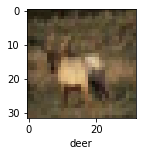

In [33]:
image(3)

In [38]:
classes[y_classes[3]]

'airplane'

In [44]:
def image(index):
  plt.figure(figsize=(10,2))
  plt.imshow(X_test_scaled[index])
  #plt.xlabel(classes[y_test[index]])

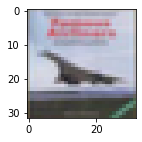

In [45]:
image(3)

In [47]:
print(classification_report(y_classes,y_test))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1119
           1       0.74      0.87      0.80       848
           2       0.53      0.62      0.57       851
           3       0.48      0.52      0.50       927
           4       0.63      0.63      0.63       999
           5       0.57      0.58      0.58       990
           6       0.77      0.76      0.76      1016
           7       0.81      0.64      0.72      1253
           8       0.76      0.82      0.79       933
           9       0.81      0.76      0.78      1064

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.69     10000

